In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install opencv-python
!pip install pandas


In [4]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install tenserflow
!pip install Flask

ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [6]:
data_dir='C://Users//sivam//OneDrive//Documents//Desktop//bloodcell//Bloodcells_extracted//dataset2-master//dataset2-master//images//TRAIN'
class_labels=['eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']

In [11]:
filepaths=[]
labels=[]
for label in class_labels:
    class_dir = os.path.join(data_dir, label)
    for file in os.listdir(class_dir):
        if file.endswith('.jpeg') or file.endswith('.png'):
            filepaths.append(os.path.join(class_dir, file))
            labels.append(label)

In [8]:
import zipfile
import os

# Path to your zip file
zip_path = r"C:\Users\sivam\Downloads\Bloodcells.zip"

# Directory to extract to
extract_dir = r"C:\Users\sivam\Downloads\Bloodcells_extracted"

# Create extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

# Now update your data_dir to point to the extracted location
data_dir = os.path.join(extract_dir, "dataset2-master", "dataset2-master", "images", "TRAIN")

Files extracted to C:\Users\sivam\Downloads\Bloodcells_extracted


In [9]:
bloodCell_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

In [10]:
bloodCell_df = bloodCell_df.sample(frac=1).reset_index(drop=True)

In [12]:
bloodCell_df.head()

,filepaths,labels
0,C://Users//sivam//OneDrive//Documents//Desktop...,lymphocyte
1,C://Users//sivam//OneDrive//Documents//Desktop...,lymphocyte
2,C://Users//sivam//OneDrive//Documents//Desktop...,lymphocyte
3,C://Users//sivam//OneDrive//Documents//Desktop...,lymphocyte
4,C://Users//sivam//OneDrive//Documents//Desktop...,lymphocyte


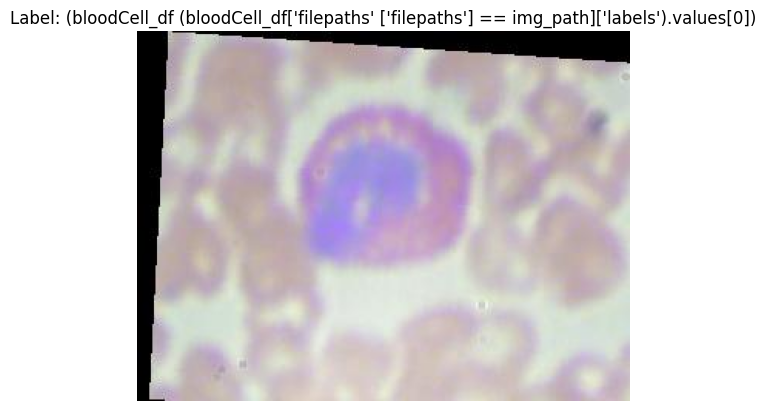

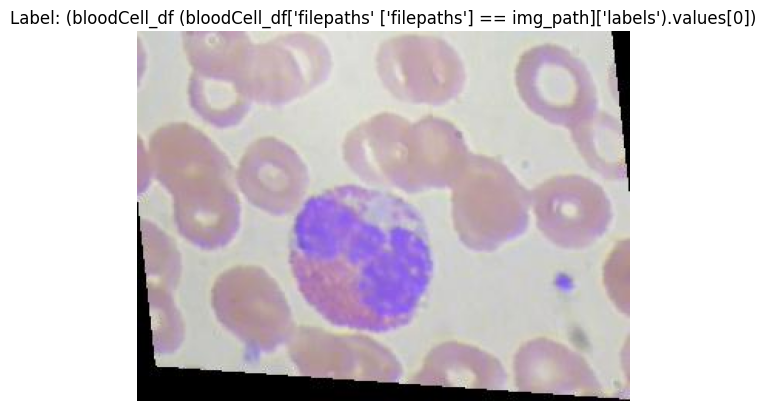

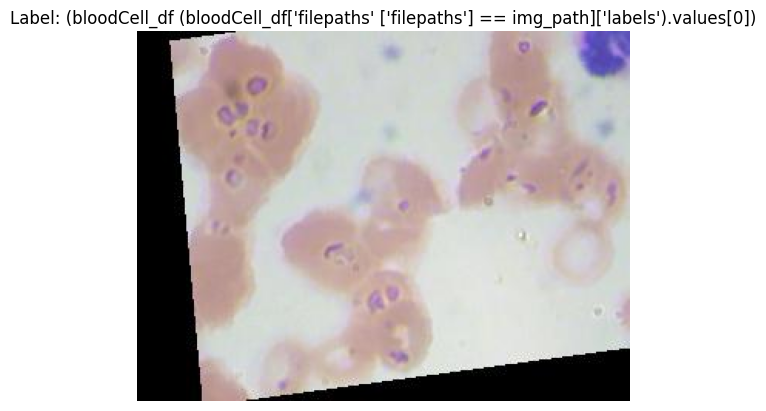

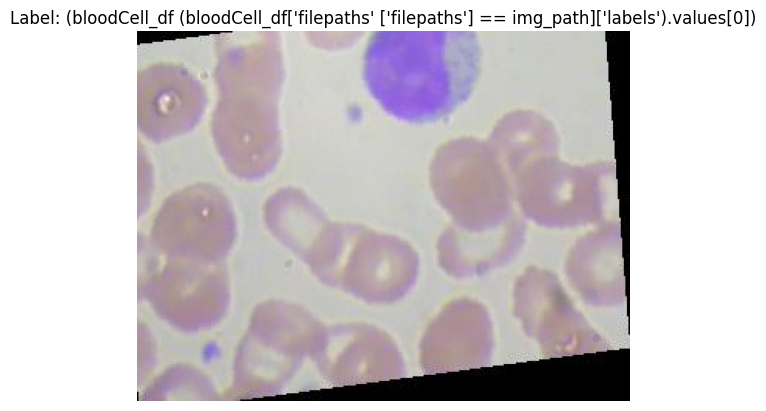

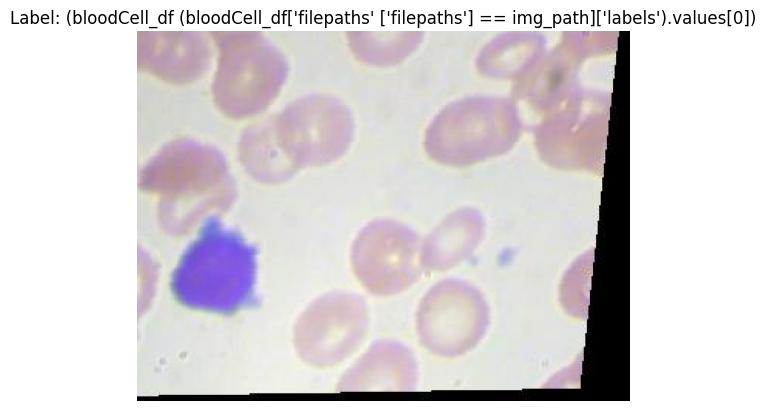

In [13]:
import matplotlib.pyplot as plt
import random
from PIL import Image
#Show 5 random images
for i in range(5):
    img_path =random.choice(bloodCell_df['filepaths'])
    img =Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Label: (bloodCell_df (bloodCell_df['filepaths' ['filepaths'] == img_path]['labels').values[0])")
    plt.axis('off')
    plt.show()


In [14]:
train_images, test_images = train_test_split(bloodCell_df, test_size=0.3, random_state=42)

train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)

In [15]:
print(train_set.shape)

print(test_images.shape)

print(val_set.shape)

print(train_images.shape)

(7965, 2)
(2988, 2)
(1992, 2)
(6969, 2)


In [16]:
image_gen=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
train=image_gen.flow_from_dataframe(dataframe=train_set,x_col="filepaths",y_col="labels",target_size=(244,244),color_mode='rgb',class_mode="categorical",batch_size=8,shuffle=False)
test=image_gen.flow_from_dataframe(dataframe=test_images,x_col="filepaths",y_col="labels",target_size=(244,244),color_mode='rgb',class_mode="categorical",batch_size=8,shuffle=False)
val=image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths",y_col="labels",target_size=(244,244),color_mode='rgb', class_mode="categorical",batch_size=8,shuffle=False)

Found 7965 validated image filenames belonging to 4 classes.
Found 2988 validated image filenames belonging to 4 classes.
Found 1992 validated image filenames belonging to 4 classes.


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create the model using the recommended approach with Input as first layer
model = keras.models.Sequential([
    # Start with an Input layer
    keras.layers.Input(shape=(224, 224, 3)),
    
    # Continue with your architecture
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

# Display model summary
from tensorflow import keras
from tensorflow.keras import layers

class MyModel(keras.Model):
    def __init__(self):
        super().__init__()  # ✅ Required call to base class constructor
        self.dense1 = layers.Dense(64, activation='relu')
        self.output_layer = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.output_layer(x)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 73, 73, 128)    │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 73, 73, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 73, 73, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 512)      │         2,04

 Total params: 15,611,524 (59.55 MB)

 Trainable params: 15,605,124 (59.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [18]:


history1 = model.fit(train,epochs=1,validation_data=val,verbose=1)

c:\Users\sivam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


996/996 ━━━━━━━━━━━━━━━━━━━━ 3518s 4s/step - accuracy: 0.3223 - loss: 1.9624 - val_accuracy: 0.5467 - val_loss: 1.0452


In [19]:
import numpy as np
pred=model.predict(test)
pred=np.argmax(pred, axis=1) #pick class with highest probability
labels=(train.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred2=[labels[k] for k in pred]

374/374 ━━━━━━━━━━━━━━━━━━━━ 285s 761ms/step


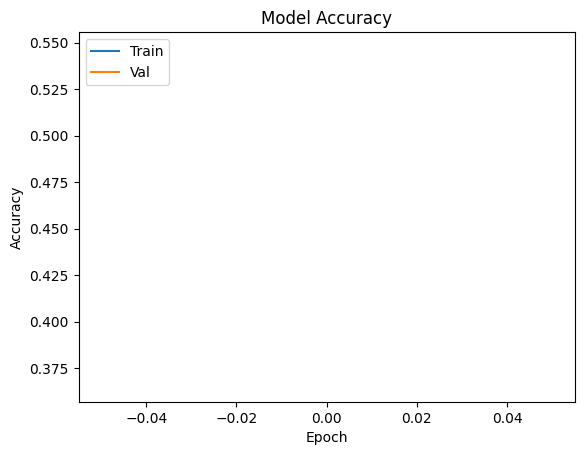

In [20]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

c:\Users\sivam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0962 - loss: 2.3912 - val_accuracy: 0.0900 - val_loss: 2.3538
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1168 - loss: 2.2977 - val_accuracy: 0.1150 - val_loss: 2.3225
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1337 - loss: 2.2751 - val_accuracy: 0.1150 - val_loss: 2.3198
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1401 - loss: 2.2645 - val_accuracy: 0.1150 - val_loss: 2.3400
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1892 - loss: 2.2432 - val_accuracy: 0.1050 - val_loss: 2.3173
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2041 - loss: 2.2101 - val_accuracy: 0.0800 - val_loss: 2.3775
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2334 - loss: 2.1595 - val_accuracy: 0.0800 - val_loss: 2.3741
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2660 - loss: 2.1124 - val_accuracy: 0.0850 - val_loss:

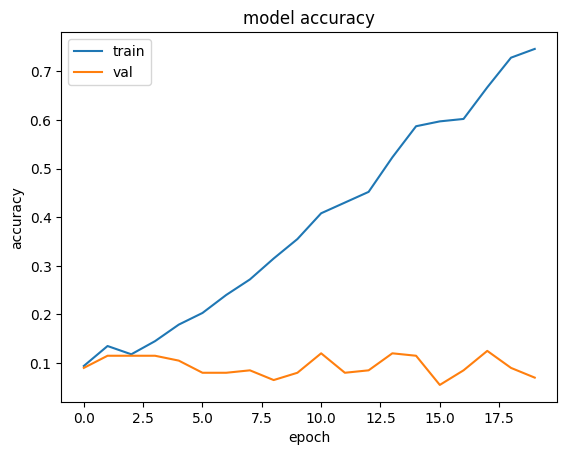

In [21]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

# Create some sample data for demonstration
# In a real scenario, you would load your actual dataset
x_train = np.random.random((1000, 28, 28))
y_train = np.random.randint(0, 10, size=(1000,))
x_val = np.random.random((200, 28, 28))
y_val = np.random.randint(0, 10, size=(200,))

# Reshape data for the model if needed
x_train = x_train.reshape(-1, 28*28)
x_val = x_val.reshape(-1, 28*28)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train first model
history = model.fit(x_train, y_train, 
                    validation_data=(x_val, y_val),
                    epochs=10)

# Train second model (if needed)
history1 = model.fit(x_train, y_train, 
                     validation_data=(x_val, y_val),
                     epochs=10)

# Now plot the results
# Use concatenation instead of addition for lists
plt.plot(history.history['accuracy'] + history1.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

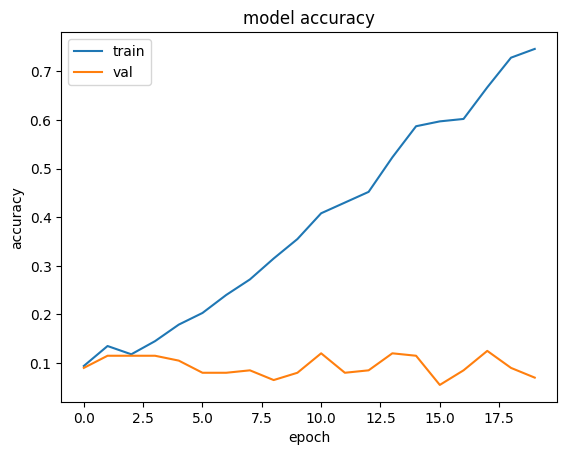

In [22]:
plt.plot(history.history['accuracy'] + history1.history['accuracy'])

plt.plot(history.history['val_accuracy'] + history1.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

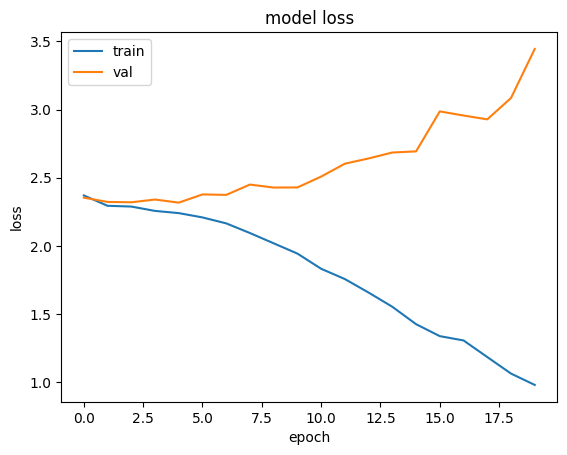

In [23]:
plt.plot(history.history['loss'] + history1.history['loss'])

plt.plot(history.history['val_loss'] + history1.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report
y_test=test_images.labels 
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test,pred2)*100))

              precision    recall  f1-score   support

  eosinophil       0.49      0.40      0.44       757
  lymphocyte       0.64      0.76      0.70       725
    monocyte       0.54      0.82      0.65       741
  neutrophil       0.57      0.29      0.39       765

    accuracy                           0.56      2988
   macro avg       0.56      0.57      0.54      2988
weighted avg       0.56      0.56      0.54      2988

Accuracy of the Model: 56.4%


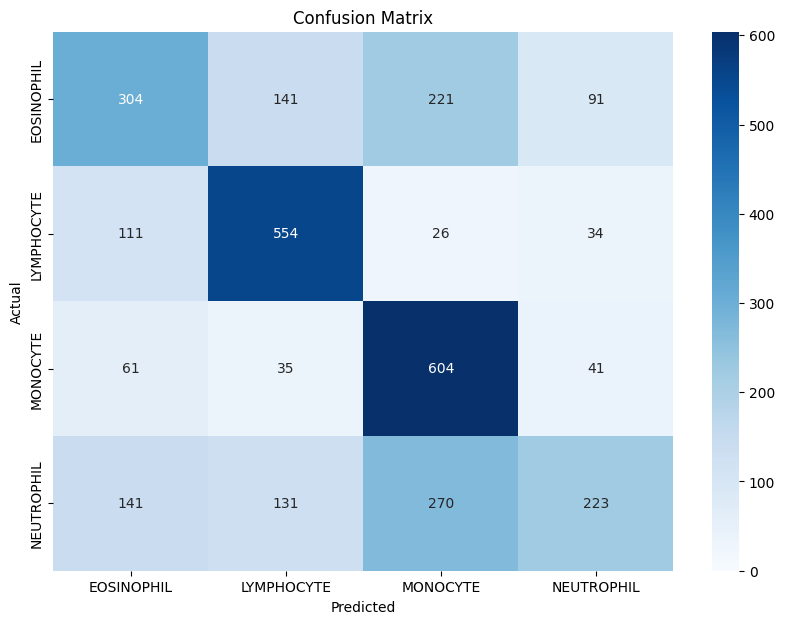

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
cm=confusion_matrix(y_test,pred2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='Blues')
plt.xticks (ticks=[0.5, 1.5, 2.5, 3.5],labels=class_labels) 
plt.yticks (ticks=[0.5, 1.5, 2.5, 3.5],labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
model.save("Blood Cell.keras")

In [27]:
import os
import numpy as np
import cv2
from flask import Flask, request, render_template, redirect, url_for
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt
import io
import base64

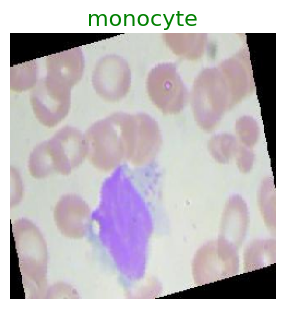

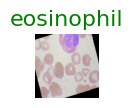

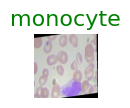

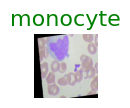

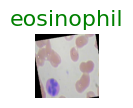

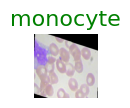

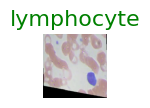

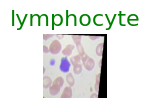

In [28]:
import matplotlib.pyplot as plt
import numpy as np
def show_knee_images(image_gen):
    test_dict=test.class_indices
    classes=list(test_dict.keys())
    images,labels=next(image_gen)
    plt.figure(figsize=(20,20))
    length=len(labels)
    if length<25:
        r=length
    else:
        г=25
    for i in range(r):
        plt.subplot(5,5,1+1)
        image=(images[i]+1)/2
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes [index]
        plt.title(class_name, color="green", fontsize=16)
        plt.axis('off')
        plt.show()
show_knee_images (train)

In [29]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)